# Trabalho 05 de Métodos Quantitativos
###### Pedro Henrique Ventura 
###### Aluno de Sistemas Multimídia da Pós Graduação em Ciência da Computação (2019). Terceiro Trimestre
## Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression

### 1. Criação da amostra
#### A amostra aqui criada, simula a evolução de um jogador, aqui dada como "Nível" (eixo X) em um RPG ficticio, onde tenta buscar analisar uma relação entre o "Tempo" (eixo Y) gasto em minutos jogando tal Jogo/RPG.

In [2]:
x = [1,2,3,4,5,6,7,8,9,10]#nivel da conta
y = [10,7,5,20,35,70,66,80,85,120]#média de minutos jogados 
xy = [x,y]

print(xy)

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [10, 7, 5, 20, 35, 70, 66, 80, 85, 120]]


### 2. Cálculo de coeficiênte de Correlação

In [3]:
r = np.corrcoef(xy)
r = r[0][1]
r2=(r*r)

print("Coeficiênte de Correlação: {:.2f}".format(r))
print("R²: {:.2f}".format(r2)+"%")

Coeficiênte de Correlação: 0.96
R²: 0.92%


### 3. Estimar parâmetros, verificar a qualidade, calcular os erros

In [4]:
# Tranforma as variáveis em formato específico para a regressão linear
Xr = np.array(x).reshape(-1,1)
Yr = np.array(y).reshape(-1,1)

# Cria e alimenta o modelo
modelo = LinearRegression()
modelo.fit(Xr,Yr)

# Interceptação b0
print("Interceptação no eixoY em X=", modelo.intercept_)

Interceptação no eixoY em X= [-19.66666667]


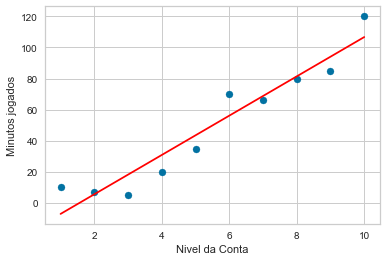

In [5]:
# Grafico
plt.xlabel('Nivel da Conta')
plt.ylabel('Minutos jogados')
plt.scatter(Xr,Yr)
plt.plot(Xr, modelo.predict(Xr),color = 'red')

In [6]:
# Previsão simulada para um nível 12
nivel =12
## Manual
print("Previsao manual do nivel",nivel,":",modelo.intercept_+modelo.coef_*nivel )

## pelo Sklearn
nivelr = [[nivel]] #Formato pedido pelo .predict()
p = modelo.predict(nivelr)
print("Previsao automatica do nivel",nivel,":", p)

Previsao manual do nivel 12 : [[131.8969697]]
Previsao automatica do nivel 12 : [[131.8969697]]


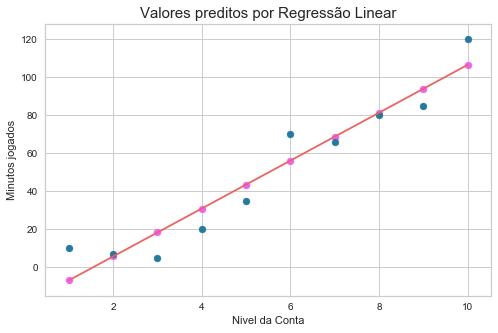

Coeficientes:
b0 :  [-19.66666667]
b1 :  [12.63030303]


In [7]:
def linear(X, b0, b1):
    return [b0+b1*x for x in X]

# b0 - Intercept (já calculado anteriormente de forma automatica pelo skit)
def intercept(X, Y, b1):
    x_ = np.mean(X)
    y_ = np.mean(Y)
    return y_-b1*x_

# b1 - Slope
def slope(X, Y): 
    x_ = np.mean(X)
    y_ = np.mean(Y)
    rise = sum([(x-x_) * (y-y_) for x,y in zip(X,Y)])
    run = sum([(x-x_)**2 for x,y in zip(X,Y)])
    return rise / run

predictor = Xr
target = Yr

b1 = slope(predictor, target)
b0 = intercept(predictor, target, b1)
predicted = linear(predictor, b0, b1)
plt.figure(figsize = (8, 5))
plt.plot(predictor, predicted, color = '#f25f5c')
plt.scatter(predictor, predicted, color = '#f25fFF')
plt.title('Valores preditos por Regressão Linear', fontsize = 15)
plt.xlabel('Nivel da Conta')
plt.ylabel('Minutos jogados')
plt.scatter(predictor, target, color = "#247ba0")
plt.show()

print("Coeficientes:\n=============")
print("b0 : ", b0)
print("b1 : ", b1)

In [11]:
#Calcular r2, ssr,sse,sst
def r_squared(Y, Y_HAT):
    ssr, sse, r_sqr = [0]*3
    y_ = np.mean(Y)
    ssr = sum([(y_hat - y_)**2 for y_hat in Y_HAT])
    sse = sum([(y - y_hat)**2 for y,y_hat in zip(Y, Y_HAT)])
    sst = sum([(y - y_)**2 for y in Y])
    r_sqr = 1 - (sse / sst)
    return r_sqr,ssr,sse,sst

r2,ssr,sse,sst=r_squared(target, predicted)
print("R²:",r2)
print("SSR:",ssr)
print("SSE:",sse)
print("SST:",sst)

R²: [0.92164877]
SSR: [13160.77575758]
SSE: [1118.82424242]
SST: [14279.6]


### 4. Calcular desvio padrão dos erros e dos parâmetros

### 5. Calcular intervalo de confiança dos parâmetros para níveis de confiança de 90%, 95% e 99%

### 6. Testar linearidade, independência de erros, erros normais, homocedasticidade (com gráficos)

Residuo do nivel 1 : [17.03636364]
Residuo do nivel 2 : [1.40606061]
Residuo do nivel 3 : [-13.22424242]
Residuo do nivel 4 : [-10.85454545]
Residuo do nivel 5 : [-8.48484848]
Residuo do nivel 6 : [13.88484848]
Residuo do nivel 7 : [-2.74545455]
Residuo do nivel 8 : [-1.37575758]
Residuo do nivel 9 : [-9.00606061]
Residuo do nivel 10 : [13.36363636]
\Total de Residuos:  [91.38181818]


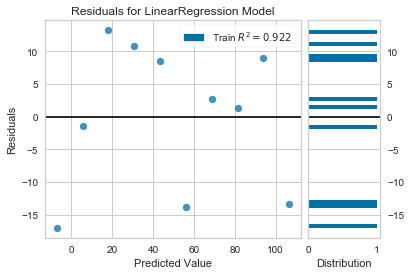

In [9]:
# Residuos
predictY = modelo.predict(Xr)
residuos=[]
residuoTotal =0
for i in range(len(predictY)):
    residuo =Yr[i]-predictY[i]
    
    print("Residuo do nivel",i+1,":",residuo)
    residuos.append(float(residuo))

    
    if(residuo<0):
            residuo=residuo*(-1)
    residuoTotal=residuoTotal+residuo

print("\Total de Residuos: ", residuoTotal)
        
# Residuos individuais e R²
visualizador = ResidualsPlot(modelo)
visualizador.fit(Xr,Yr)
visualizador.poof()